In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')

In [11]:
df.sample(5)

,Age,EstimatedSalary,Purchased
365,59,29000,1
311,39,96000,1
346,53,72000,1
50,24,32000,0
10,26,80000,0


In [20]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], train_size=0.9)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#we fit the scaler to the training data set, it will learn the parameters
scaler.fit(xTrain)

#now we transform the xTrain and xTest dataset to their respective scaled values
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [23]:
xTrainScaled # the scaler.transform() function returns a numpy array, we need to convert it into a pandas dataframe now

array([[-1.63319285,  0.045871  ],
       [-1.06116487, -0.36476814],
       [-0.01244691, -0.15944857],
       [-0.2984609 , -0.51142497],
       [ 0.65491907, -1.12738368],
       [ 0.08289109,  1.04313747],
       [ 1.41762305,  0.33918467],
       [ 0.36890508,  0.1338651 ],
       [-1.06116487, -0.36476814],
       [ 0.84559507,  1.01380611],
       [ 0.17822909,  0.2218592 ],
       [-1.44251686, -0.65808181],
       [-0.67981288, -0.36476814],
       [ 1.03627106, -1.24470915],
       [-0.1077849 ,  1.95240985],
       [ 1.89431303, -0.95139548],
       [-1.53785485, -0.2181113 ],
       [-0.1077849 , -1.09805231],
       [ 1.32228505,  2.33371762],
       [ 0.84559507, -1.47936008],
       [ 0.84559507, -1.33270325],
       [ 0.27356709, -0.54075634],
       [-0.2984609 , -0.33543677],
       [ 0.84559507, -1.39136598],
       [-1.34717886, -0.45276224],
       [-1.91920684, -0.77540727],
       [-1.06116487,  0.7498238 ],
       [ 0.27356709, -0.57008771],
       [-1.15650287,

In [25]:
xTrainScaled = pd.DataFrame(xTrainScaled, columns=xTrain.columns)
xTestScaled = pd.DataFrame(xTestScaled, columns=xTest.columns)

In [28]:
np.round(xTrainScaled.describe(), 1)

,Age,EstimatedSalary
count,360.0,360.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.1,2.3


In [29]:
xTrainScaled

,Age,EstimatedSalary
0,-1.633193,0.045871
1,-1.061165,-0.364768
2,-0.012447,-0.159449
3,-0.298461,-0.511425
4,0.654919,-1.127384
...,...,...
355,2.084989,0.925812
356,-0.584475,-1.538023
357,-0.298461,-1.332703
358,1.894313,-0.687413


<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

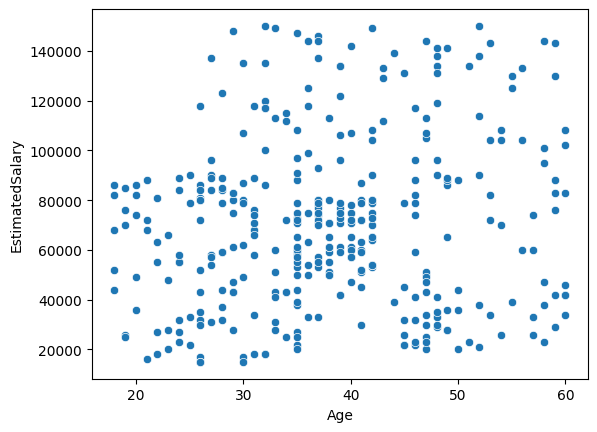

In [33]:
sns.scatterplot(data=xTrain, x='Age', y='EstimatedSalary')

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

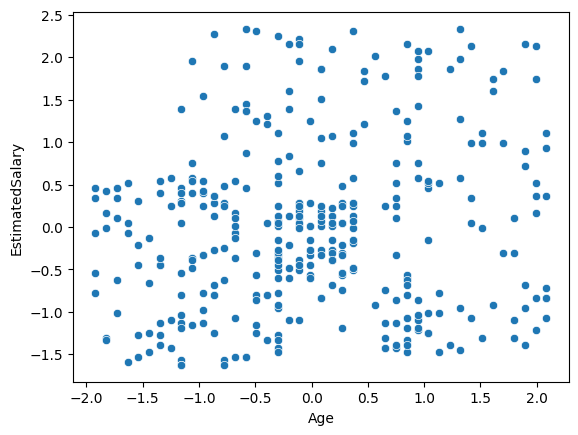

In [37]:
sns.scatterplot(data=xTrainScaled, x='Age', y='EstimatedSalary')

<AxesSubplot: xlabel='Age', ylabel='Density'>

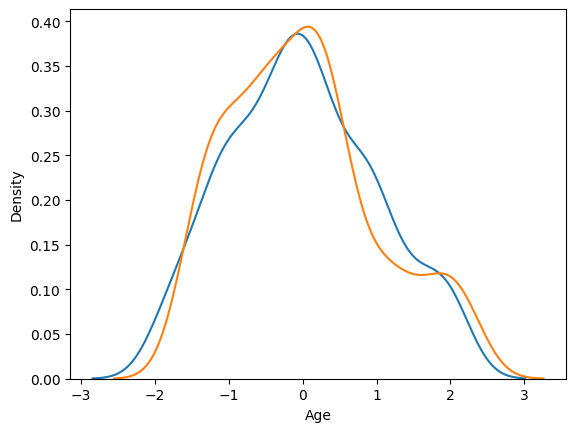

In [44]:
sns.kdeplot(xTrainScaled['Age'])
sns.kdeplot(xTrainScaled['EstimatedSalary'])

<AxesSubplot: xlabel='Age', ylabel='Density'>

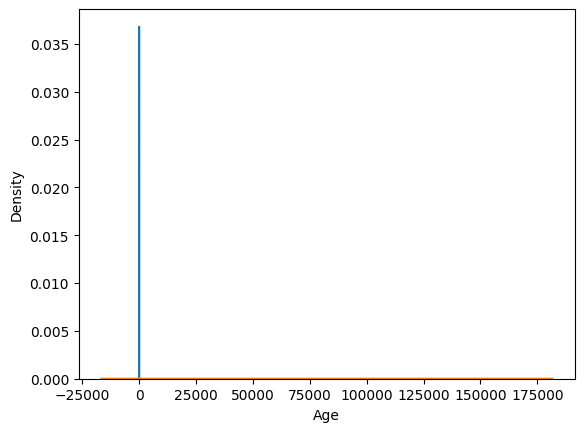

In [45]:
sns.kdeplot(xTrain['Age'])
sns.kdeplot(xTrain['EstimatedSalary'])

# Checking the Efficiency of the LOGISTIC REGRESSION algorithm with scaled and unscaled data

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr1 = LogisticRegression()
lr2 = LogisticRegression()

In [48]:
lr1.fit(xTrainScaled, yTrain)
lr2.fit(xTrain, yTrain)

LogisticRegression()

In [55]:
predicted1=lr1.predict(xTestScaled)
predicted2=lr2.predict(xTest)

In [56]:
from sklearn.metrics import accuracy_score

In [62]:
print("Scaled Data: {}".format(accuracy_score(yTest, predicted1)*100), "%")
print("Unscaled Data: ", accuracy_score(yTest, predicted2)*100, "%")



Scaled Data: 92.5 %
Unscaled Data:  85.0 %
